# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler
import plotter
import utils

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)


Enhancing dataset: 100%|██████████| 2/2 [00:00<?, ?it/s]


# Methods


In [5]:
def convert_to_minutes(time_str):
    """Convert a time string in 'X min Y s' format to total minutes as a float."""
    parts = time_str.split()
    minutes = int(parts[0]) if parts else 0
    seconds = int(parts[2]) if len(parts) > 2 else 0
    return minutes + seconds / 60.0


# Main

In [6]:
# copy / pasted data from https://www.tomtom.com/traffic-index/oslo-traffic/
# step by step guide
# 1. Scroll down to "Driving patterns in Oslo" where you will find the matrix
# 2. Toggle "Metro area" and "Show travel time per 10 km"
# 3. Select the text inside the matrix (skip the times on the left-most column) and copy
# 4. Paste the data under here

data = """
Mon
12 min
12 min
12 min
12 min
11 min
10 min
12 min
15 min
18 min
14 min
13 min
13 min
14 min
14 min
14 min
17 min
19 min
16 min
14 min
14 min
13 min
13 min
13 min
13 min
Tue
13 min
13 min
12 min
12 min
11 min
10 min
12 min
16 min
18 min
15 min
13 min
14 min
14 min
14 min
15 min
18 min
20 min
16 min
14 min
14 min
13 min
13 min
13 min
13 min
Wed
13 min
13 min
13 min
12 min
11 min
10 min
12 min
15 min
18 min
14 min
13 min
14 min
14 min
14 min
15 min
18 min
20 min
16 min
15 min
14 min
13 min
13 min
14 min
13 min
Thu
13 min
13 min
13 min
13 min
11 min
10 min
12 min
15 min
17 min
14 min
13 min
14 min
14 min
14 min
15 min
19 min
20 min
16 min
14 min
14 min
13 min
13 min
14 min
13 min
Fri
13 min
13 min
14 min
13 min
11 min
10 min
11 min
13 min
15 min
13 min
13 min
13 min
14 min
15 min
16 min
18 min
17 min
15 min
14 min
13 min
13 min
13 min
13 min
14 min
Sat
14 min
14 min
15 min
15 min
13 min
12 min
11 min
11 min
11 min
12 min
12 min
13 min
13 min
14 min
14 min
14 min
14 min
13 min
13 min
13 min
13 min
13 min
13 min
14 min
Sun
14 min
14 min
15 min
15 min
13 min
12 min
12 min
11 min
11 min
11 min
12 min
12 min
13 min
13 min
13 min
13 min
13 min
13 min
13 min
13 min
12 min
12 min
12 min
12 min
""".strip().split("\n")


In [11]:
# Initialize an empty dictionary to hold our structured data.
structured_data = {}
current_day = ""

for line in data:
    # If the line represents a day, update the current_day and initialize an empty list for it.
    if line in ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]:
        current_day = line
        structured_data[current_day] = []
    else:
        # Else, strip the " min" part and convert the number to an integer, then append it to the current day's list.
        structured_data[current_day].append(convert_to_minutes(line))

import pandas as pd

# Convert the dictionary into a DataFrame
df = pd.DataFrame.from_dict(structured_data, orient="index")

# Transpose the DataFrame to get days as columns and hours as rows
df = df.transpose()

# Rename the columns to represent each day of the week more clearly
df.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Rename the index to represent each hour of the day more clearly
df.index = [f"{hour}:00" for hour in range(24)]

df.head(24)


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0:00,12.0,13.0,13.0,13.0,13.0,14.0,14.0
1:00,12.0,13.0,13.0,13.0,13.0,14.0,14.0
2:00,12.0,12.0,13.0,13.0,14.0,15.0,15.0
3:00,12.0,12.0,12.0,13.0,13.0,15.0,15.0
4:00,11.0,11.0,11.0,11.0,11.0,13.0,13.0
5:00,10.0,10.0,10.0,10.0,10.0,12.0,12.0
6:00,12.0,12.0,12.0,12.0,11.0,11.0,12.0
7:00,15.0,16.0,15.0,15.0,13.0,11.0,11.0
8:00,18.0,18.0,18.0,17.0,15.0,11.0,11.0
9:00,14.0,15.0,14.0,14.0,13.0,12.0,11.0


In [8]:
normalized_factors_df = df.copy()



# Normalize each column separately

for column in normalized_factors_df:

    min_value = normalized_factors_df[column].min()

    normalized_factors_df[column] = normalized_factors_df[column] / min_value



# Show the first 24 hours with the new normalization approach

normalized_factors_df.head(24)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0:00,1.2,1.3,1.3,1.3,1.3,1.272727,1.272727
1:00,1.2,1.3,1.3,1.3,1.3,1.272727,1.272727
2:00,1.2,1.2,1.3,1.3,1.4,1.363636,1.363636
3:00,1.2,1.2,1.2,1.3,1.3,1.363636,1.363636
4:00,1.1,1.1,1.1,1.1,1.1,1.181818,1.181818
5:00,1.0,1.0,1.0,1.0,1.0,1.090909,1.090909
6:00,1.2,1.2,1.2,1.2,1.1,1.000000,1.090909
7:00,1.5,1.6,1.5,1.5,1.3,1.000000,1.000000
8:00,1.8,1.8,1.8,1.7,1.5,1.000000,1.000000
9:00,1.4,1.5,1.4,1.4,1.3,1.090909,1.000000


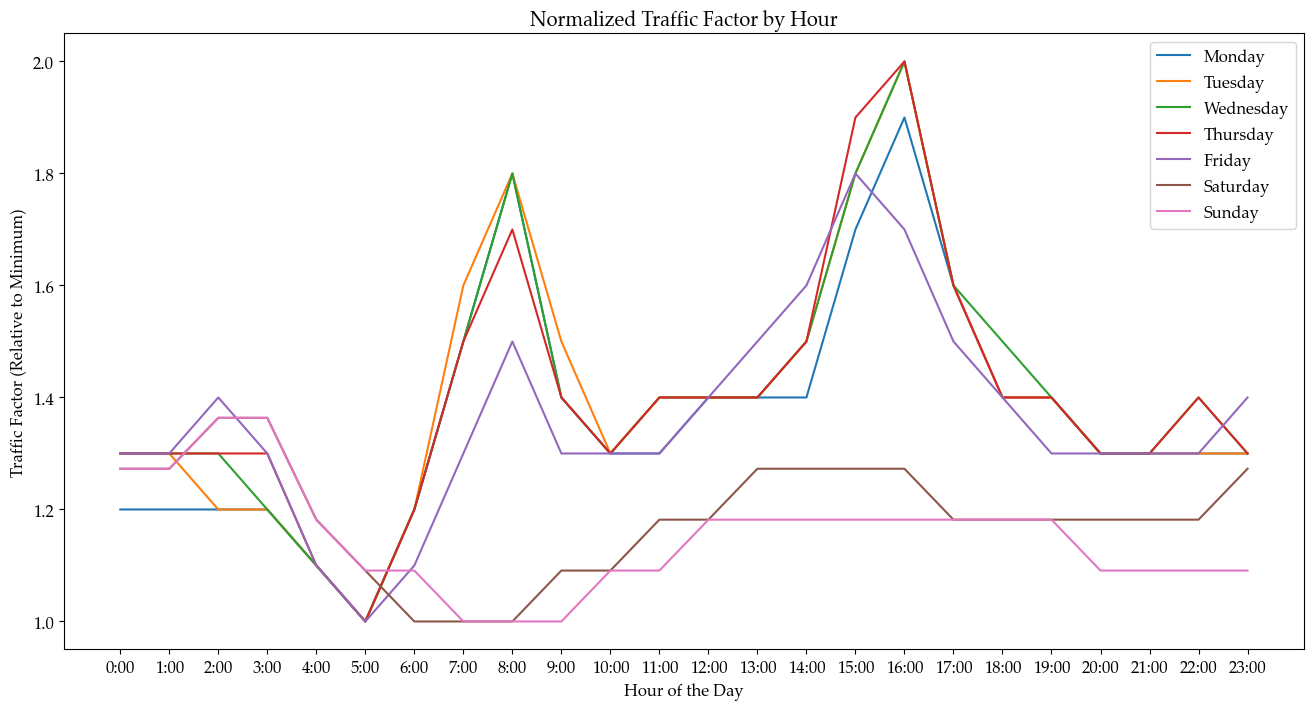

In [9]:
# Plotting each day on the same graph with color coding and a legend
plt.figure(figsize=(16, 8))

# Iterate through each day (column) in the DataFrame and plot
for column in normalized_factors_df.columns:
    plt.plot(normalized_factors_df.index, normalized_factors_df[column], label=column)

# Adding title and labels
plt.title("Normalized Traffic Factor by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Traffic Factor (Relative to Minimum)")

# Adjusting x-axis to show every hour
plt.xticks(rotation=0)
plt.xticks(normalized_factors_df.index)

# Adding a legend
plt.legend()

plt.show()


In [10]:
data_preprocessor.save_dataframe(
    normalized_factors_df,
    os.path.join(constants.PROJECT_DIRECTORY_PATH, "data", "oslo", "traffic.csv")
)
